In [5]:
import pandas as pd
data_dir = "../../data/"
price = pd.read_csv(data_dir + "processed/item_price_lag_filled.csv")
print(price.head())
trend = pd.read_csv(data_dir + "raw/nst_광어_trend_2025-01-17.csv")
print(trend.head())

    priceDate item market  minPrice  avgPrice  maxPrice  avgPrice_lag_1  \
0  2015-02-25   광어   가락시장   25000.0   25000.0   25000.0             NaN   
1  2015-02-26   광어   가락시장   25000.0   25000.0   25000.0         25000.0   
2  2015-02-27   광어   가락시장   25000.0   25000.0   25000.0         25000.0   
3  2015-02-28   광어   가락시장   25000.0   25000.0   25000.0         25000.0   
4  2015-03-01   광어   가락시장   25000.0   25000.0   25000.0         25000.0   

   avgPrice_lag_2  avgPrice_lag_3  avgPrice_lag_7  
0             NaN             NaN             NaN  
1             NaN             NaN             NaN  
2         25000.0             NaN             NaN  
3         25000.0         25000.0             NaN  
4         25000.0         25000.0             NaN  
   idx    age name     score        date
0    0  06_12   광어  1.398471  2016-01-01
1    1  06_12   광어  2.725172  2016-01-02
2    2  06_12   광어  1.090436  2016-01-03
3    3  06_12   광어  1.110405  2016-01-04
4    4  06_12   광어  1.492906  20

In [18]:
# 날짜 컬럼 변환
price["priceDate"] = pd.to_datetime(price["priceDate"])
trend["date"] = pd.to_datetime(trend["date"])

# 월 정보 추가
price["month"] = price["priceDate"].dt.month
price["month"] = price["month"].astype("category")

# 요일 정보 추가 (0: 월요일, 6: 일요일)
price["day_of_week"] = price["priceDate"].dt.dayofweek
price["day_of_week"] = price["day_of_week"].astype("category")

# 결과 확인
print(price.head())

# trend 데이터에서 age와 name별로 score 값을 새로운 컬럼으로 변환
trend_pivot = trend.pivot_table(
    index="date", columns=["age", "name"], values="score"
)

# 멀티 인덱스를 플랫하게 변환
trend_pivot.columns = [f"{col[0]}_{col[1]}" for col in trend_pivot.columns]
print(trend_pivot.head())

target_col = "avgPrice"
    
    
    

   priceDate item market  minPrice  avgPrice  maxPrice  avgPrice_lag_1  \
0 2015-02-25   광어   가락시장   25000.0   25000.0   25000.0             NaN   
1 2015-02-26   광어   가락시장   25000.0   25000.0   25000.0         25000.0   
2 2015-02-27   광어   가락시장   25000.0   25000.0   25000.0         25000.0   
3 2015-02-28   광어   가락시장   25000.0   25000.0   25000.0         25000.0   
4 2015-03-01   광어   가락시장   25000.0   25000.0   25000.0         25000.0   

   avgPrice_lag_2  avgPrice_lag_3  avgPrice_lag_7 month day_of_week  
0             NaN             NaN             NaN     2           2  
1             NaN             NaN             NaN     2           3  
2         25000.0             NaN             NaN     2           4  
3         25000.0         25000.0             NaN     2           5  
4         25000.0         25000.0             NaN     3           6  
            06_12_광어  13_18_광어  19_24_광어  25_29_광어  30_34_광어  35_39_광어  \
date                                                         

In [19]:
def gen_merge():
    # 병합
    merged_data = pd.merge(price, trend_pivot, left_on="priceDate", right_on="date", how="left")

    # 필요 없는 컬럼 제거
    # merged_data.drop(columns=["date"], inplace=True)

    # 결측값 제거
    merged_data = merged_data.dropna()

    # 타겟 변수와 피처 분리
    ignored_cols = ["priceDate", "minPrice", "maxPrice"]  # 분석에 포함하지 않을 컬럼

    # pycaret에 사용할 데이터 준비
    merged_data = merged_data.drop(columns=ignored_cols)

    # 결과 확인
    # print(merged_data.head())
    return merged_data

<class 'pandas.core.frame.DataFrame'>
Index: 156087 entries, 310 to 163846
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   item            156087 non-null  object  
 1   market          156087 non-null  object  
 2   avgPrice        156087 non-null  float64 
 3   avgPrice_lag_1  156087 non-null  float64 
 4   avgPrice_lag_2  156087 non-null  float64 
 5   avgPrice_lag_3  156087 non-null  float64 
 6   avgPrice_lag_7  156087 non-null  float64 
 7   month           156087 non-null  category
 8   day_of_week     156087 non-null  category
 9   06_12_광어        156087 non-null  float64 
 10  13_18_광어        156087 non-null  float64 
 11  19_24_광어        156087 non-null  float64 
 12  25_29_광어        156087 non-null  float64 
 13  30_34_광어        156087 non-null  float64 
 14  35_39_광어        156087 non-null  float64 
 15  40_44_광어        156087 non-null  float64 
 16  45_49_광어        156087 non-null  float64 

### 전체 데이터로 확인

In [ ]:
merged_data = gen_merge()
print(merged_data.info())

In [10]:
import pandas as pd
from pycaret.regression import setup, compare_models, get_config

# PyCaret 설정
regression_setup = setup(
    data=merged_data,
    target=target_col,
    session_id=1030,  # 재현성을 위한 난수 시드
    normalize=True  # 데이터 스케일링
)

# 여러 모델 비교 및 최적 모델 선정
best_model = compare_models()


,Description,Value
0,Session id,1030
1,Target,avgPrice
2,Target type,Regression
3,Original data shape,"(156087, 20)"
4,Transformed data shape,"(156087, 53)"
5,Transformed train set shape,"(109260, 53)"
6,Transformed test set shape,"(46827, 53)"
7,Numeric features,15
8,Categorical features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,378.0367,1143462.7266,1067.8993,0.9958,0.0279,0.0115,0.4950
et,Extra Trees Regressor,375.2216,1161766.0821,1076.8542,0.9957,0.0278,0.0109,11.0760
rf,Random Forest Regressor,380.3372,1181491.4619,1085.6474,0.9957,0.0280,0.0111,17.5490
lasso,Lasso Regression,390.1552,1207540.2272,1097.5697,0.9956,0.0296,0.0126,0.8310
ridge,Ridge Regression,393.6940,1207412.4004,1097.5120,0.9956,0.0297,0.0129,0.2510
llar,Lasso Least Angle Regression,391.0948,1207136.9791,1097.3846,0.9956,0.0296,0.0126,0.1530
br,Bayesian Ridge,393.6013,1207418.0495,1097.5133,0.9956,0.0297,0.0129,0.2380
gbr,Gradient Boosting Regressor,397.2139,1192808.5884,1090.7786,0.9956,0.0285,0.0123,3.7370
lr,Linear Regression,393.5971,1207556.9223,1097.5710,0.9956,0.0297,0.0128,0.4210
xgboost,Extreme Gradient Boosting,417.0812,1249570.9250,1116.6602,0.9954,0.0289,0.0126,0.5200


In [11]:
# 피처 이름과 중요도 길이 확인
processed_features = get_config("X_train_transformed").columns
print("Processed Features:", processed_features)
print("Number of importances:", best_model.feature_importances_)

# print(get_config("X_train").columns)
# print(best_model.feature_importances_)
print("Model type:", type(best_model))

Processed Features: Index(['item_대게', 'item_참돔', 'item_연어', 'item_광어', 'item_농어', 'item_방어',
       'item_우럭', 'market_소래포구종합어시장', 'market_안양평촌농수산물시장', 'market_수원농수산물시장',
       'market_인천종합연안부두어시장', 'market_강서농수산물시장', 'market_가락시장',
       'market_구리농수산물시장', 'market_노량진 2층', 'market_노량진 1층', 'market_마포농수산물시장',
       'market_부산민락어민활어직판장', 'avgPrice_lag_1', 'avgPrice_lag_2',
       'avgPrice_lag_3', 'avgPrice_lag_7', 'month_1.0', 'month_11.0',
       'month_7.0', 'month_5.0', 'month_8.0', 'month_12.0', 'month_4.0',
       'month_3.0', 'month_6.0', 'month_9.0', 'month_10.0', 'month_2.0',
       'day_of_week_5.0', 'day_of_week_1.0', 'day_of_week_6.0',
       'day_of_week_2.0', 'day_of_week_3.0', 'day_of_week_4.0',
       'day_of_week_0.0', '06_12_광어', '13_18_광어', '19_24_광어', '25_29_광어',
       '30_34_광어', '35_39_광어', '40_44_광어', '45_49_광어', '50_54_광어', '55_59_광어',
       '60_80_광어'],
      dtype='object')
Number of importances: [ 70   0  33   6   1   8   3  11   1   0   5   2  10   8  20

In [12]:
# 피처 중요도 데이터프레임 생성
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": processed_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 결과 확인
print(feature_importance_df)


               Feature  Importance
18      avgPrice_lag_1         635
20      avgPrice_lag_3         341
19      avgPrice_lag_2         330
21      avgPrice_lag_7         302
43            19_24_광어         124
49            50_54_광어         113
47            40_44_광어         101
42            13_18_광어         101
51            60_80_광어          98
50            55_59_광어          96
48            45_49_광어          89
44            25_29_광어          73
45            30_34_광어          72
0              item_대게          70
46            35_39_광어          63
41            06_12_광어          62
27          month_12.0          42
2              item_연어          33
29           month_3.0          27
25           month_5.0          27
34     day_of_week_5.0          24
15       market_노량진 1층          23
14       market_노량진 2층          20
28           month_4.0          14
7     market_소래포구종합어시장          11
12         market_가락시장          10
33           month_2.0           9
23          month_11

<Figure size 1000x600 with 0 Axes>

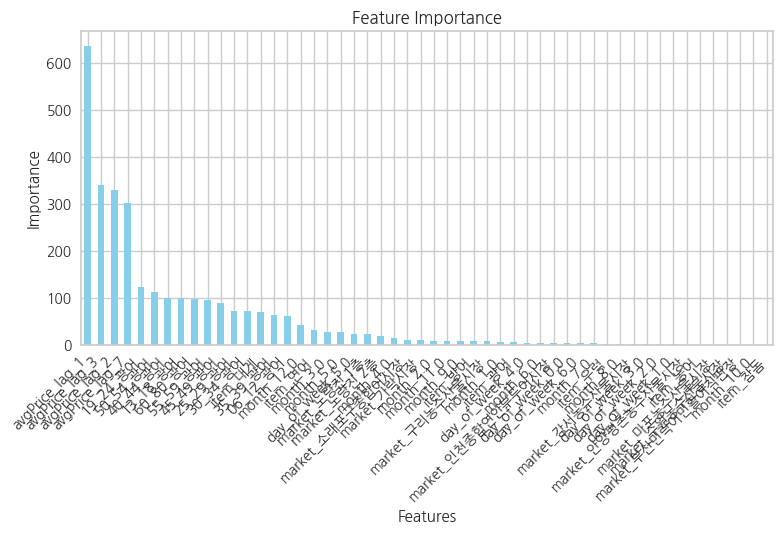

In [13]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 중요도 시각화
plt.figure(figsize=(10, 6))
feature_importance_df.plot(kind="bar", x="Feature", y="Importance", legend=False, color="skyblue")
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 광어 데이터로만 확인

In [20]:
merged_data = gen_merge()

# print(merged_data.head())
merged_data = merged_data[merged_data["item"] == "광어"]
merged_data.drop(columns=["item"], inplace=True)
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30126 entries, 310 to 31495
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   market          30126 non-null  object  
 1   avgPrice        30126 non-null  float64 
 2   avgPrice_lag_1  30126 non-null  float64 
 3   avgPrice_lag_2  30126 non-null  float64 
 4   avgPrice_lag_3  30126 non-null  float64 
 5   avgPrice_lag_7  30126 non-null  float64 
 6   month           30126 non-null  category
 7   day_of_week     30126 non-null  category
 8   06_12_광어        30126 non-null  float64 
 9   13_18_광어        30126 non-null  float64 
 10  19_24_광어        30126 non-null  float64 
 11  25_29_광어        30126 non-null  float64 
 12  30_34_광어        30126 non-null  float64 
 13  35_39_광어        30126 non-null  float64 
 14  40_44_광어        30126 non-null  float64 
 15  45_49_광어        30126 non-null  float64 
 16  50_54_광어        30126 non-null  float64 
 17  55_59_광어       

In [21]:
import pandas as pd
from pycaret.regression import setup, compare_models, get_config

# PyCaret 설정
regression_setup = setup(
    data=merged_data,
    target=target_col,
    session_id=1030,  # 재현성을 위한 난수 시드
    normalize=True  # 데이터 스케일링
)

# 여러 모델 비교 및 최적 모델 선정
best_model = compare_models()


,Description,Value
0,Session id,1030
1,Target,avgPrice
2,Target type,Regression
3,Original data shape,"(30126, 19)"
4,Transformed data shape,"(30126, 46)"
5,Transformed train set shape,"(21088, 46)"
6,Transformed test set shape,"(9038, 46)"
7,Numeric features,15
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,283.3164,488623.0410,698.3652,0.9791,0.0189,0.0078,0.8830
lightgbm,Light Gradient Boosting Machine,298.0443,487830.9979,698.1684,0.9791,0.0189,0.0082,0.2170
rf,Random Forest Regressor,291.3105,499506.5008,706.3457,0.9786,0.0191,0.0080,2.0760
gbr,Gradient Boosting Regressor,300.5380,506058.5256,711.0790,0.9783,0.0193,0.0083,0.6510
ridge,Ridge Regression,308.5617,515998.2002,718.0558,0.9779,0.0195,0.0086,0.1400
lasso,Lasso Regression,306.5245,515883.7685,717.9748,0.9779,0.0195,0.0085,0.2290
lr,Linear Regression,309.5908,516168.3107,718.1757,0.9779,0.0195,0.0086,0.2540
huber,Huber Regressor,286.4339,517165.4433,718.8641,0.9779,0.0195,0.0079,0.1650
br,Bayesian Ridge,308.6416,515976.7135,718.0412,0.9779,0.0195,0.0086,0.0340
llar,Lasso Least Angle Regression,306.5153,515886.6250,717.9772,0.9779,0.0195,0.0085,0.0330


In [22]:
# 피처 이름과 중요도 길이 확인
processed_features = get_config("X_train_transformed").columns
print("Processed Features:", processed_features)
print("Number of importances:", best_model.feature_importances_)

# print(get_config("X_train").columns)
# print(best_model.feature_importances_)
print("Model type:", type(best_model))

# 피처 중요도 데이터프레임 생성
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": processed_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 결과 확인
print(feature_importance_df)

Processed Features: Index(['market_안양평촌농수산물시장', 'market_소래포구종합어시장', 'market_강서농수산물시장',
       'market_인천종합연안부두어시장', 'market_노량진 2층', 'market_노량진 1층', 'market_가락시장',
       'market_구리농수산물시장', 'market_부산민락어민활어직판장', 'market_마포농수산물시장',
       'market_수원농수산물시장', 'avgPrice_lag_1', 'avgPrice_lag_2', 'avgPrice_lag_3',
       'avgPrice_lag_7', 'month_5.0', 'month_1.0', 'month_11.0', 'month_6.0',
       'month_10.0', 'month_4.0', 'month_2.0', 'month_7.0', 'month_3.0',
       'month_8.0', 'month_9.0', 'month_12.0', 'day_of_week_0.0',
       'day_of_week_2.0', 'day_of_week_3.0', 'day_of_week_5.0',
       'day_of_week_6.0', 'day_of_week_1.0', 'day_of_week_4.0', '06_12_광어',
       '13_18_광어', '19_24_광어', '25_29_광어', '30_34_광어', '35_39_광어', '40_44_광어',
       '45_49_광어', '50_54_광어', '55_59_광어', '60_80_광어'],
      dtype='object')
Number of importances: [5.83503053e-04 8.83076032e-04 1.33859786e-02 1.14617969e-03
 4.02069192e-04 4.01728824e-04 1.59963675e-03 1.09912980e-03
 2.61172036e-04 1.43406058e-0

<Figure size 1000x600 with 0 Axes>

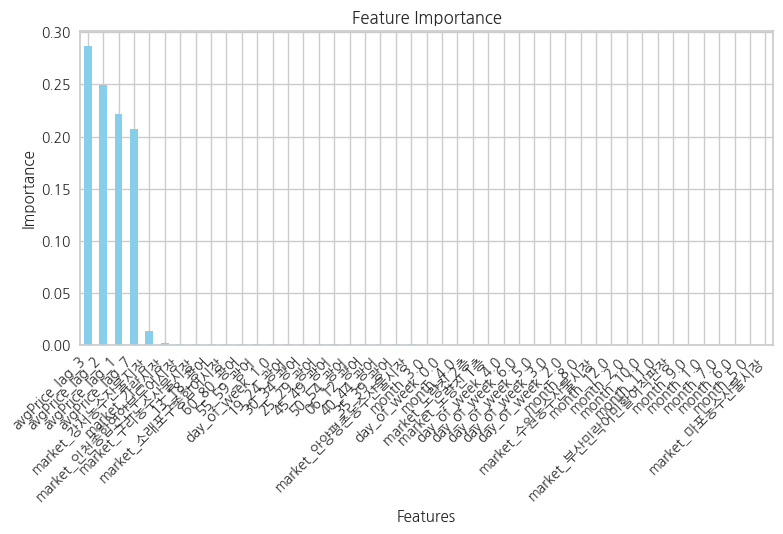

In [23]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 중요도 시각화
plt.figure(figsize=(10, 6))
feature_importance_df.plot(kind="bar", x="Feature", y="Importance", legend=False, color="skyblue")
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 가락시장 데이터로만 확인

In [43]:
merged_data = gen_merge()

# print(merged_data.head())
merged_data = merged_data[merged_data["item"] == "광어"]
merged_data = merged_data[merged_data["market"] == "가락시장"]
merged_data.drop(columns=["item", "market"], inplace=True)
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 310 to 3597
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   avgPrice        3288 non-null   float64 
 1   avgPrice_lag_1  3288 non-null   float64 
 2   avgPrice_lag_2  3288 non-null   float64 
 3   avgPrice_lag_3  3288 non-null   float64 
 4   avgPrice_lag_7  3288 non-null   float64 
 5   month           3288 non-null   category
 6   day_of_week     3288 non-null   category
 7   06_12_광어        3288 non-null   float64 
 8   13_18_광어        3288 non-null   float64 
 9   19_24_광어        3288 non-null   float64 
 10  25_29_광어        3288 non-null   float64 
 11  30_34_광어        3288 non-null   float64 
 12  35_39_광어        3288 non-null   float64 
 13  40_44_광어        3288 non-null   float64 
 14  45_49_광어        3288 non-null   float64 
 15  50_54_광어        3288 non-null   float64 
 16  55_59_광어        3288 non-null   float64 
 17  60_80_광어        3

In [44]:
from pycaret.regression import setup, compare_models, get_config

# PyCaret 설정
regression_setup = setup(
    data=merged_data,
    target=target_col,
    session_id=1030,  # 재현성을 위한 난수 시드
    normalize=True  # 데이터 스케일링
)

# 여러 모델 비교 및 최적 모델 선정
best_model = compare_models()

,Description,Value
0,Session id,1030
1,Target,avgPrice
2,Target type,Regression
3,Original data shape,"(3288, 18)"
4,Transformed data shape,"(3288, 35)"
5,Transformed train set shape,"(2301, 35)"
6,Transformed test set shape,"(987, 35)"
7,Numeric features,15
8,Categorical features,2
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,329.8222,450497.8855,661.3321,0.9803,0.0174,0.0089,0.0920
et,Extra Trees Regressor,310.0268,451780.0252,662.2160,0.9802,0.0173,0.0084,0.0800
rf,Random Forest Regressor,318.7339,454588.2871,664.7812,0.9801,0.0175,0.0086,0.1870
par,Passive Aggressive Regressor,315.3499,462190.9885,665.0584,0.9798,0.0175,0.0085,0.0100
lightgbm,Light Gradient Boosting Machine,358.2626,475390.7576,680.2740,0.9793,0.0180,0.0097,0.1730
huber,Huber Regressor,307.1963,475675.3219,672.2131,0.9793,0.0177,0.0083,0.0170
br,Bayesian Ridge,326.6510,477169.2026,677.2151,0.9792,0.0179,0.0089,0.0100
lasso,Lasso Regression,324.6758,477685.0592,677.2194,0.9791,0.0179,0.0088,0.1870
ridge,Ridge Regression,326.5671,477849.5609,677.5911,0.9791,0.0179,0.0089,0.1240
lar,Least Angle Regression,326.5202,478628.8760,678.0102,0.9791,0.0179,0.0089,0.0100


In [45]:
# 피처 이름과 중요도 길이 확인
processed_features = get_config("X_train_transformed").columns
print("Processed Features:", processed_features)
print("Number of importances:", best_model.feature_importances_)

# print(get_config("X_train").columns)
# print(best_model.feature_importances_)
print("Model type:", type(best_model))

# 피처 중요도 데이터프레임 생성
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": processed_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 결과 확인
print(feature_importance_df)

Processed Features: Index(['avgPrice_lag_1', 'avgPrice_lag_2', 'avgPrice_lag_3', 'avgPrice_lag_7',
       'month_7.0', 'month_8.0', 'month_1.0', 'month_11.0', 'month_6.0',
       'month_3.0', 'month_10.0', 'month_5.0', 'month_9.0', 'month_12.0',
       'month_4.0', 'month_2.0', 'day_of_week_6.0', 'day_of_week_5.0',
       'day_of_week_0.0', 'day_of_week_4.0', 'day_of_week_2.0',
       'day_of_week_1.0', 'day_of_week_3.0', '06_12_광어', '13_18_광어',
       '19_24_광어', '25_29_광어', '30_34_광어', '35_39_광어', '40_44_광어', '45_49_광어',
       '50_54_광어', '55_59_광어', '60_80_광어'],
      dtype='object')
Number of importances: [8.29414217e-01 5.30289226e-02 8.06954596e-02 3.29535363e-02
 0.00000000e+00 5.27396588e-05 0.00000000e+00 4.84061942e-06
 6.80625236e-05 1.72546295e-05 1.37719477e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.77029270e-04 0.00000000e+00
 0.00000000e+00 5.43015848e-06 6.24584154e-06 6.03856884e-05
 5.20871002e-06 0.00000000e+00 8.17603575e-06 2.15506444e-04
 1.88426469e-04 

<Figure size 1000x600 with 0 Axes>

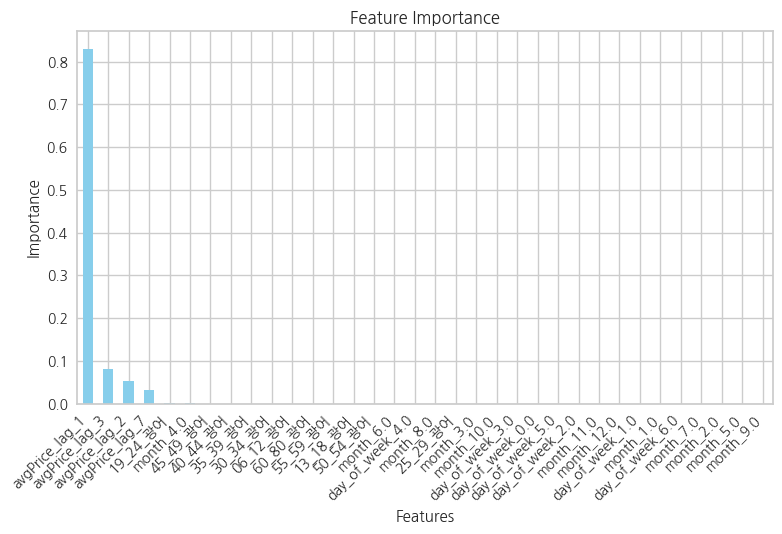

In [46]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 중요도 시각화
plt.figure(figsize=(10, 6))
feature_importance_df.plot(kind="bar", x="Feature", y="Importance", legend=False, color="skyblue")
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 이전 가격 정보 빼고 확인 - 중요한 피처를 확인하기 위해

In [47]:
merged_data = gen_merge()

# print(merged_data.head())
merged_data = merged_data[merged_data["item"] == "광어"]
merged_data = merged_data[merged_data["market"] == "가락시장"]
merged_data.drop(columns=["item", "market", "avgPrice_lag_1", "avgPrice_lag_2", "avgPrice_lag_3", "avgPrice_lag_7"], inplace=True)
print(merged_data.info())



<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 310 to 3597
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   avgPrice     3288 non-null   float64 
 1   month        3288 non-null   category
 2   day_of_week  3288 non-null   category
 3   06_12_광어     3288 non-null   float64 
 4   13_18_광어     3288 non-null   float64 
 5   19_24_광어     3288 non-null   float64 
 6   25_29_광어     3288 non-null   float64 
 7   30_34_광어     3288 non-null   float64 
 8   35_39_광어     3288 non-null   float64 
 9   40_44_광어     3288 non-null   float64 
 10  45_49_광어     3288 non-null   float64 
 11  50_54_광어     3288 non-null   float64 
 12  55_59_광어     3288 non-null   float64 
 13  60_80_광어     3288 non-null   float64 
dtypes: category(2), float64(12)
memory usage: 340.9 KB
None


In [48]:
from pycaret.regression import setup, compare_models, get_config

# PyCaret 설정
regression_setup = setup(
    data=merged_data,
    target=target_col,
    session_id=1030,  # 재현성을 위한 난수 시드
    normalize=True  # 데이터 스케일링
)

# 여러 모델 비교 및 최적 모델 선정
best_model = compare_models()


,Description,Value
0,Session id,1030
1,Target,avgPrice
2,Target type,Regression
3,Original data shape,"(3288, 14)"
4,Transformed data shape,"(3288, 31)"
5,Transformed train set shape,"(2301, 31)"
6,Transformed test set shape,"(987, 31)"
7,Numeric features,11
8,Categorical features,2
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2021.7647,7533299.8683,2740.1008,0.6713,0.0757,0.0564,0.0910
rf,Random Forest Regressor,1990.1381,7772072.2506,2783.2687,0.6610,0.0769,0.0556,0.1930
gbr,Gradient Boosting Regressor,2062.5373,7866954.1206,2800.4677,0.6567,0.0775,0.0576,0.0850
lightgbm,Light Gradient Boosting Machine,2060.0211,7884121.0442,2804.4712,0.6555,0.0775,0.0573,0.1870
xgboost,Extreme Gradient Boosting,2109.4974,8427808.0000,2897.2749,0.6322,0.0800,0.0588,0.0880
ada,AdaBoost Regressor,2757.5295,11059399.9637,3322.2456,0.5176,0.0910,0.0759,0.0340
knn,K Neighbors Regressor,2710.1874,12342259.3000,3510.2842,0.4599,0.0968,0.0763,0.0150
br,Bayesian Ridge,2926.4149,13497864.5955,3666.2034,0.4101,0.1107,0.0818,0.0110
llar,Lasso Least Angle Regression,2919.4819,13517726.1391,3668.2144,0.4092,0.1099,0.0817,0.0090
lasso,Lasso Regression,2919.4752,13517687.4891,3668.2092,0.4092,0.1099,0.0817,0.0110


In [49]:
# 피처 이름과 중요도 길이 확인
processed_features = get_config("X_train_transformed").columns
print("Processed Features:", processed_features)
print("Number of importances:", best_model.feature_importances_)

# print(get_config("X_train").columns)
# print(best_model.feature_importances_)
print("Model type:", type(best_model))

# 피처 중요도 데이터프레임 생성
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": processed_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 결과 확인
print(feature_importance_df)

Processed Features: Index(['month_7.0', 'month_8.0', 'month_1.0', 'month_11.0', 'month_6.0',
       'month_3.0', 'month_10.0', 'month_5.0', 'month_9.0', 'month_12.0',
       'month_4.0', 'month_2.0', 'day_of_week_6.0', 'day_of_week_5.0',
       'day_of_week_0.0', 'day_of_week_4.0', 'day_of_week_2.0',
       'day_of_week_1.0', 'day_of_week_3.0', '06_12_광어', '13_18_광어',
       '19_24_광어', '25_29_광어', '30_34_광어', '35_39_광어', '40_44_광어', '45_49_광어',
       '50_54_광어', '55_59_광어', '60_80_광어'],
      dtype='object')
Number of importances: [0.00678114 0.00975571 0.00815814 0.01086101 0.00499185 0.00902955
 0.00796768 0.00571671 0.01768959 0.00685172 0.00729274 0.00458229
 0.00700261 0.00667249 0.00833108 0.00732638 0.00751863 0.00802937
 0.00771309 0.02086232 0.05378499 0.27790661 0.170008   0.06262199
 0.04574743 0.07343088 0.0542982  0.04092615 0.02376499 0.02437664]
Model type: <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>
            Feature  Importance
21         19_24_광어    0.2

<Figure size 1000x600 with 0 Axes>

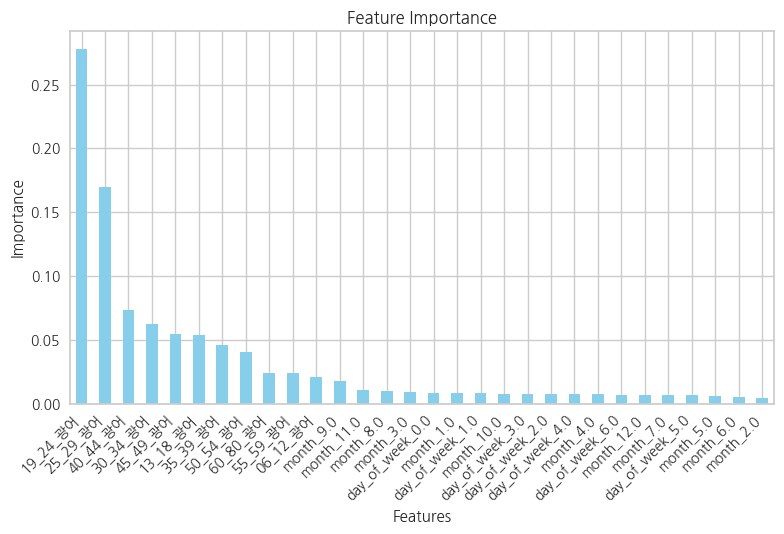

In [50]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 중요도 시각화
plt.figure(figsize=(10, 6))
feature_importance_df.plot(kind="bar", x="Feature", y="Importance", legend=False, color="skyblue")
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### todo: 트렌드데이터 날짜 조정, lag unfilled 데이터 활용